## Exploratory Data Analysis Capstone

### LA Crime Dataset

The analysis mainly focuses on the LA crime dataset, which contains all the crimes committed from 2020 up to present. Some questions to be answered in this analyis are:
- What gender is the most victimized?
- What race is the most victimized?
- What are the most common crimes?
- Where do the crimes commonly occur?
- Is there a correlation between the number of COVID-19 cases to the number of daily active cases in the US?
- During what day are people likely to have their vehicles stolen?
- During what day are people likely to be assaulted?
- What is the probability of vandalism occuring based on the day of the week?

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import foursquare
import json

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

### Reference for dataset: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

In [140]:
df = pd.read_csv("data/Crime_Data_from_2020_to_Present.csv")
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,23,M,H,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,1402 0392,0,X,X,726.0,POLICE FACILITY,NaN,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,23,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201817357,09/12/2020 12:00:00 AM,09/12/2020 12:00:00 AM,30,18,Southeast,1871,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421 1822,21,F,B,101.0,STREET,511.0,VERBAL THREAT,IC,Invest Cont,930.0,NaN,NaN,NaN,ROSECRANS,VERMONT,33.9019,-118.2916


In [141]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [4]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.493490e+05,249349.000000,249349.000000,249349.000000,249349.000000,249349.000000,249349.000000,249345.000000,91357.000000,249347.000000,20489.000000,700.000000,23.000000,249349.000000,249349.000000
mean,2.034052e+08,1356.091398,10.801507,1126.204144,1.410224,509.466880,29.918444,292.684963,363.168055,509.202156,955.757675,982.760000,987.347826,33.828667,-117.507381
std,4.312185e+06,648.141311,6.038985,603.988880,0.491875,209.912495,21.770106,212.166877,122.961321,209.703590,116.094911,52.584066,38.930718,2.873907,9.975673
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000,110.000000,210.000000,626.000000,821.000000,0.000000,-118.667600
25%,2.007128e+08,925.000000,6.000000,628.000000,1.000000,330.000000,7.000000,101.000000,309.000000,330.000000,998.000000,998.000000,998.000000,34.007800,-118.429700
50%,2.014109e+08,1436.000000,11.000000,1149.000000,1.000000,510.000000,31.000000,203.000000,400.000000,510.000000,998.000000,998.000000,998.000000,34.057500,-118.321200
75%,2.021095e+08,1900.000000,16.000000,1622.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.199047e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,998.000000,34.333000,0.000000


In [6]:
df.shape

(249349, 28)

### Grouping by Crime Type

In [5]:
df_grouped_crime = pd.DataFrame(df['Crm Cd Desc'].value_counts().head(10)).reset_index()
df_grouped_crime.rename(columns={'index': 'Type', 'Crm Cd Desc': 'Total Count'}, inplace = True)
df_grouped_crime

,Type,Total Count
0,VEHICLE - STOLEN,27032
1,BATTERY - SIMPLE ASSAULT,20431
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",16436
3,BURGLARY FROM VEHICLE,16199
4,BURGLARY,16075
5,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14783
6,INTIMATE PARTNER - SIMPLE ASSAULT,13683
7,THEFT PLAIN - PETTY ($950 & UNDER),13518
8,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),12000
9,THEFT OF IDENTITY,9106


Text(0.5, 1.0, 'Top 10 Crime Cases per Type')

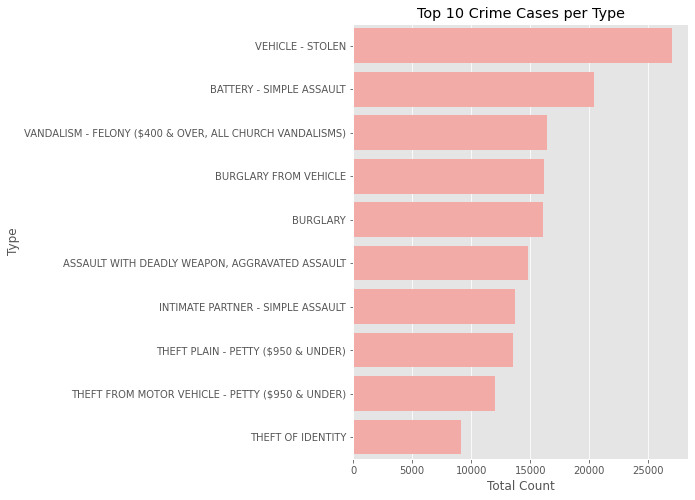

In [6]:
f, ax = plt.subplots(figsize=(6, 8))
sns.set_color_codes("pastel")
sns.barplot(x="Total Count", y="Type", data=df_grouped_crime, color="r").set_title("Top 10 Crime Cases per Type")

### Grouping by Gender

In [7]:
df.replace({'Vict Sex' : { 'M' : 'Male', 'F' : 'Female', 'X' : 'Unknown', 'H' : 'Homosexual'}}, inplace = True)

In [8]:
df_grouped_gender = pd.DataFrame(df['Vict Sex'].value_counts()).reset_index()
df_grouped_gender.rename(columns={'index': 'Gender', 'Vict Sex': 'Total Count'}, inplace = True)
df_grouped_gender

,Gender,Total Count
0,Male,105984
1,Female,89623
2,Unknown,20872
3,Homosexual,21


Text(0.5, 1.0, 'Victim Count by Gender')

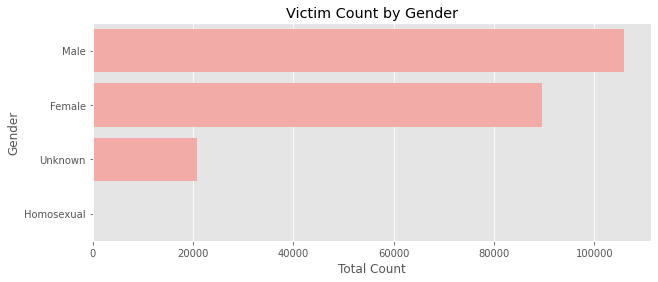

In [9]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x="Total Count", y="Gender", data=df_grouped_gender, color="r").set_title("Victim Count by Gender")

### Grouping by Ethnic Descent

In [69]:
df.replace({'Vict Descent' : descent_dict}, inplace = True)

In [74]:
df_grouped_descent = pd.DataFrame(df['Vict Descent'].value_counts().head(10)).reset_index()
df_grouped_descent.rename(columns={'index': 'Ethnic Descent', 'Vict Descent': 'Total Count'}, inplace = True)
df_grouped_descent

,Ethnic Descent,Total Count
0,Hispanic/Latin/Mexican,76471
1,White,52974
2,Black,35490
3,Unknown,23188
4,Other,19970
5,Other Asian,5436
6,Korean,1056
7,Filipino,678
8,Chinese,547
9,Japanese,219


Text(0.5, 1.0, 'Victim Count by Ethnic Descent')

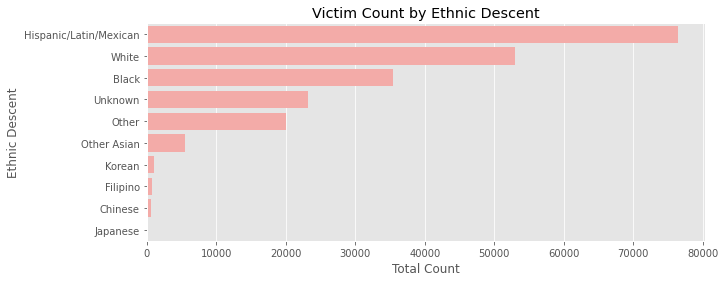

In [75]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x="Total Count", y="Ethnic Descent", data=df_grouped_descent, color="r").set_title("Victim Count by Ethnic Descent")

In [142]:
df['Month'] = df['DATE OCC'].str.slice(0, 2)
df['Year'] = df['DATE OCC'].str.slice(6, 10)
df['DATE OCC'] = df['DATE OCC'].str.slice(0,10)

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month,Year
0,10304468,01/08/2020 12:00:00 AM,01/08/2020,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,01,2020
1,190101086,01/02/2020 12:00:00 AM,01/01/2020,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,01,2020
2,201220752,09/16/2020 12:00:00 AM,09/16/2020,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,09,2020
3,191501505,01/01/2020 12:00:00 AM,01/01/2020,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,01,2020
4,191921269,01/01/2020 12:00:00 AM,01/01/2020,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,01,2020


In [143]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['day_of_week'] = df['DATE OCC'].dt.day_name()

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month,Year,day_of_week
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,01,2020,Wednesday
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,01,2020,Wednesday
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,09,2020,Wednesday
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,01,2020,Wednesday
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,01,2020,Wednesday


In [144]:
df_cleaned = df[['DATE OCC', 'Month', 'Year', 'day_of_week', 'TIME OCC', 'LAT', 'LON']]
df_cleaned.head()

,DATE OCC,Month,Year,day_of_week,TIME OCC,LAT,LON
0,2020-01-08,01,2020,Wednesday,2230,34.0141,-118.2978
1,2020-01-01,01,2020,Wednesday,330,34.0459,-118.2545
2,2020-09-16,09,2020,Wednesday,1230,33.9739,-118.2630
3,2020-01-01,01,2020,Wednesday,1730,34.1685,-118.4019
4,2020-01-01,01,2020,Wednesday,415,34.2198,-118.4468


In [13]:
df_grouped_day = pd.DataFrame(df_cleaned['day_of_week'].value_counts()).reset_index()
df_grouped_day.rename(columns={'index': 'Day', 'day_of_week': 'Total Count'}, inplace = True)
df_grouped_day

,Day,Total Count
0,Friday,37845
1,Saturday,36679
2,Wednesday,35503
3,Monday,35328
4,Thursday,35074
5,Sunday,34602
6,Tuesday,34318


Text(0.5, 1.0, 'Crime by Day')

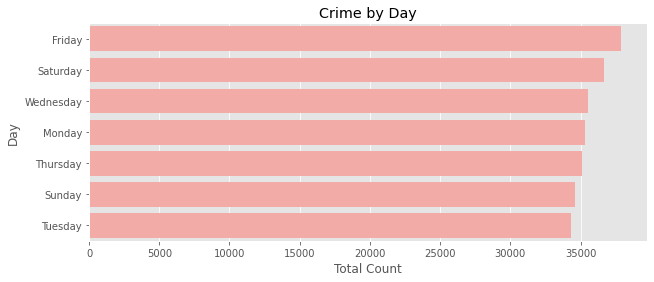

In [14]:
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x="Total Count", y="Day", data=df_grouped_day, color="r").set_title("Crime by Day")

---

### Generating clusters of crimes on the map

In [15]:
df_cleaned = df_cleaned[df_cleaned['Year'] == '2020']
df_cleaned = df_cleaned[df_cleaned['LAT'] > 0]

In [16]:
df_cleaned.shape

(195384, 7)

In [17]:
stats = pd.DataFrame()
stats["mean"] = df_cleaned[['LAT', 'LON']].mean()
stats["std_dev"] = df_cleaned[['LAT', 'LON']].std()
stats["var"] = df_cleaned[['LAT', 'LON']].var()
stats

,mean,std_dev,var
LAT,34.072902,0.113303,0.012838
LON,-118.354527,0.104194,0.010856


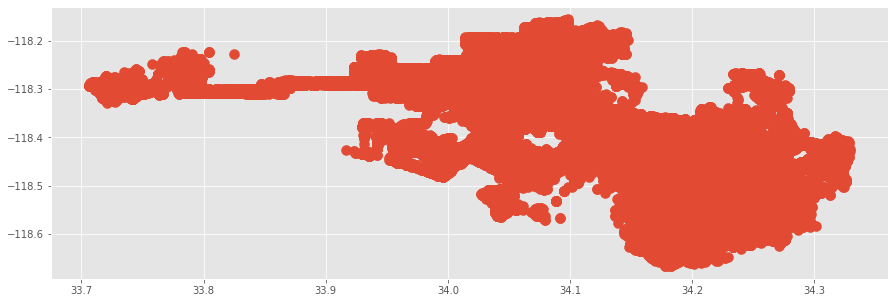

In [18]:
x = np.array(df_cleaned[["LAT", "LON"]].values.tolist())
plt.scatter(x[:, 0], x[:, 1], s=100)

In [190]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

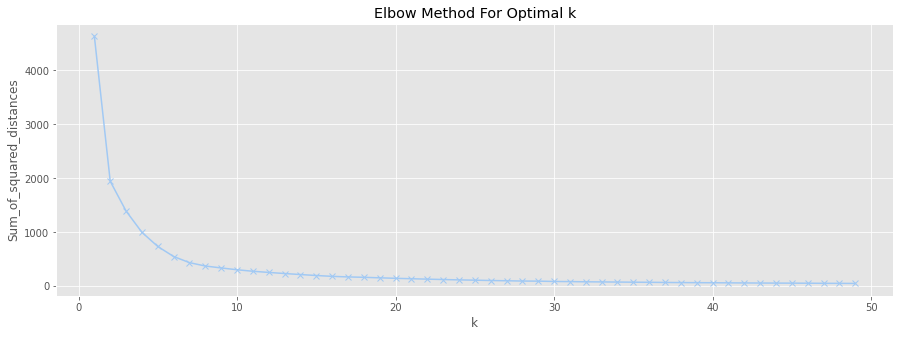

In [191]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [20]:
centers = kmeans.cluster_centers_

df_centers = pd.DataFrame(data = centers[:,:], 
                          columns = ['LAT', 'LON']) 
df_centers.head()

,LAT,LON
0,34.157636,-118.381619
1,34.049089,-118.253890
2,34.187728,-118.532137
3,33.785934,-118.272833
4,33.990297,-118.455151


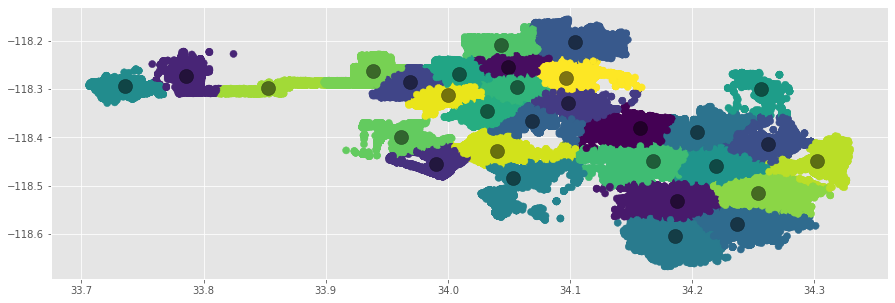

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [22]:
basemap = folium.Map(location=[34.0522, -118.2437], tiles="cartodbdark_matter", zoom_start=10)

for index, row in df_centers.iterrows():
    folium.CircleMarker([row["LAT"], row["LON"]], radius=8,
    popup = folium.Popup(str(row["LAT"]) + " " + str(row["LON"]), parse_html=True),
    fill=True).add_to(basemap)
    
    basemap.save('LA_crime.html')

basemap

A large chunk of crimes commonly occur in the center of LA, where there is a lot of neighborhoods and suburban areas.

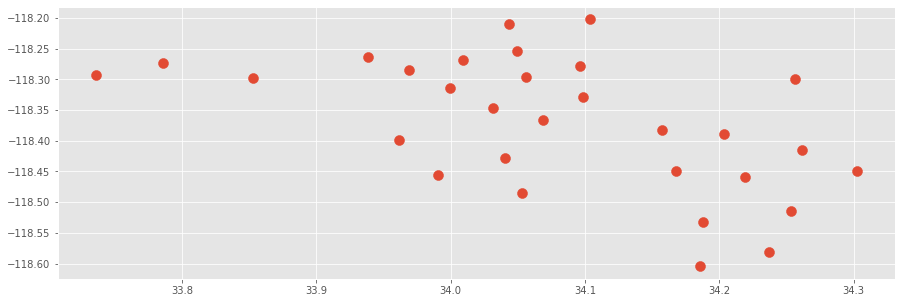

In [27]:
x = np.array(df_centers[["LAT", "LON"]].values.tolist())
plt.scatter(x[:, 0], x[:, 1], s=100)

In [29]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

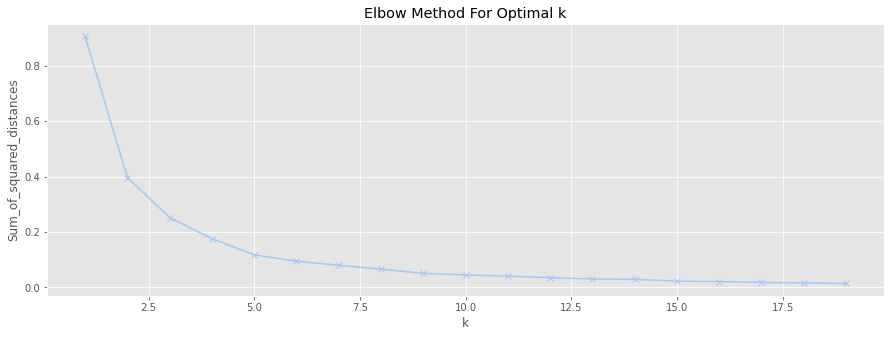

In [30]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

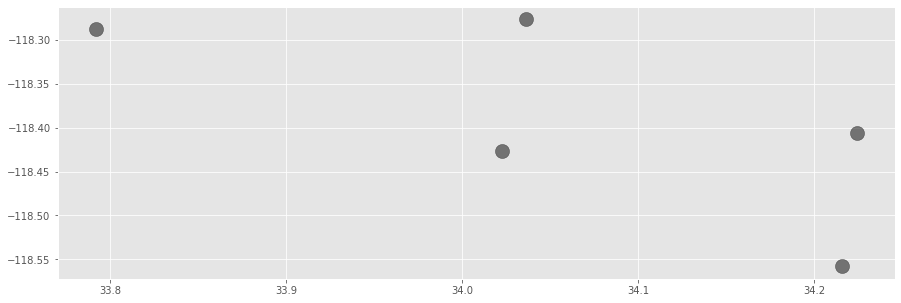

In [34]:
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [35]:
df_centers = pd.DataFrame(data = centers[:,:], 
                          columns = ['LAT', 'LON']) 

In [36]:
la_map = folium.Map(location=[34.0522, -118.2437], tiles="cartodbdark_matter", zoom_start=10)

for index, row in df_centers.iterrows():
    folium.CircleMarker([row["LAT"], row["LON"]], radius=12,
    popup = folium.Popup(str(row["LAT"]) + " " + str(row["LON"]), parse_html=True),
    fill=True).add_to(la_map)
    
la_map.save('LA_crime_cluster.html')

la_map

From these clusters, it can be inferred that the majority of crimes occur in suburban areas and touristic areas such as Santa Monica and Long Beach.

In [179]:
topics = ["police station", "police department", "jail"]

# Construct the client object
client = foursquare.Foursquare(client_id='PMMQLMQT5R2MIBC2AOGNTVIYWCKH5RIECIYRD1B1YB455S5T', 
                               client_secret='0XPCUF5W4H5VXSZCDOL1MGDP3NY12ICVBBXBOVA1GM51EHPU', 
                               redirect_uri='http://fondu.com/oauth/authorize')

# Build the authorization url for your app
auth_uri = client.oauth.auth_url()

### Some City of Los Angeles Info

The city extends for 44 miles (71 km) north-south and for 29 miles (47 km) east-west. The perimeter of the city is 342 miles (550 km). Los Angeles is both flat and hilly.

This is why the radius for the Foursquare query is 71,000.

In [180]:
response = [client.venues.search(params={'query': topic, 
                                         'll': '34.0522, -118.2437',
                                        'radius': 71000,
                                        'limit': 30, 
                                        'intent': "browse", 
                                        'categoryId': '4d4b7105d754a06375d81259'})
            for topic in topics]

In [181]:
data_list = []
for x in range(len(response)):
    try:
        for i in range(len(response[x]["venues"])):
            poi_id =  response[x]["venues"][i]["id"]
            poi_name =  response[x]["venues"][i]["name"]
            poi_lat =  response[x]["venues"][i]["location"]["lat"]
            poi_lng =  response[x]["venues"][i]["location"]["lng"]
            data_list.append([poi_id, poi_name, poi_lat, poi_lng])
    except KeyError:
        pass

df_police = pd.DataFrame(data_list, columns=["id", "name", "lat", "lng"])
df_police = df_police.drop_duplicates()
df_police["name"] = df_police['name'].str.lower()

In [182]:
df_police.to_csv("police_station.csv")
df_police.head()

,id,name,lat,lng
0,4af44d95f964a52024f121e3,lapd - hollenbeck community police station,34.044724,-118.212871
1,4b836f0ef964a520430631e3,lapd northeast police station,34.118978,-118.249748
2,4b48288df964a520414926e3,lapd west valley community police station,34.193525,-118.547193
3,4b482916f964a520484926e3,van nuys community police station,34.183857,-118.444613
4,4c17e6c16a21c9b6e538c897,newton community police station,34.012485,-118.255957


In [23]:
df_police = pd.read_csv("police_station.csv")
df_police.head()

,Unnamed: 0,id,name,lat,lng
0,0,4af44d95f964a52024f121e3,lapd - hollenbeck community police station,34.044724,-118.212871
1,1,4b836f0ef964a520430631e3,lapd northeast police station,34.118978,-118.249748
2,2,4b48288df964a520414926e3,lapd west valley community police station,34.193525,-118.547193
3,3,4b482916f964a520484926e3,van nuys community police station,34.183857,-118.444613
4,4,4c17e6c16a21c9b6e538c897,newton community police station,34.012485,-118.255957


In [26]:
for index, row in df_police.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=8,
    popup = folium.Popup(str(row["lat"]) + " " + str(row["lng"]), parse_html=True),
    color = 'darkred',
    fill=True).add_to(basemap)
    
basemap.save('LA_crime_police.html')
basemap

Even though there is an abundance of law enforcement establishments spread throughout LA, the clusters of crimes still occur near the mentioned buildings.

In [93]:
df_month = pd.DataFrame(df_cleaned.groupby(df_cleaned['DATE OCC'].dt.strftime('%B'))['DATE OCC'].count())
df_month.rename(columns={'DATE OCC': 'crime_count'}, inplace = True)
df_month_final = df_month.reset_index()
df_month_final.rename(columns={'DATE OCC': 'month'}, inplace = True)
df_month_final["month"] = pd.to_datetime(df_month_final.month, format='%B', errors='coerce').dt.month
df_month_final = df_month_final.sort_values(by="month")
df_month_final = df_month_final.reset_index()
df_month_final = df_month_final[['month', 'crime_count']]
df_month_final

,month,crime_count
0,1,18108
1,2,17082
2,3,15873
3,4,15389
4,5,16900
5,6,16694
6,7,16725
7,8,16535
8,9,15394
9,10,16141


### Using the USA Covid Daily Cases Data to Link to Crime Occurence
Reference: https://www.kaggle.com/josephassaker/covid19-global-dataset

In [69]:
df2 = pd.read_csv("data/worldometer_coronavirus_daily_data.csv")
df2.head(10)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
5,2020-2-20,Afghanistan,0.0,NaN,0.0,0.0,NaN
6,2020-2-21,Afghanistan,0.0,NaN,0.0,0.0,NaN
7,2020-2-22,Afghanistan,0.0,NaN,0.0,0.0,NaN
8,2020-2-23,Afghanistan,0.0,NaN,0.0,0.0,NaN
9,2020-2-24,Afghanistan,1.0,NaN,1.0,0.0,NaN


In [70]:
df2.shape

(95289, 7)

In [71]:
df2.dtypes

date                        object
country                     object
cumulative_total_cases     float64
daily_new_cases            float64
active_cases               float64
cumulative_total_deaths    float64
daily_new_deaths           float64
dtype: object

In [72]:
df2['date'] = pd.to_datetime(df2['date'])

In [73]:
df_usa = df2[df2['country'] == 'USA']
df_usa.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
90939,2020-02-15,USA,15.0,NaN,12.0,0.0,NaN
90940,2020-02-16,USA,15.0,0.0,12.0,0.0,NaN
90941,2020-02-17,USA,15.0,0.0,12.0,0.0,NaN
90942,2020-02-18,USA,15.0,0.0,12.0,0.0,NaN
90943,2020-02-19,USA,15.0,0.0,12.0,0.0,NaN


In [74]:
df_usa.shape

(435, 7)

In [75]:
df_usa['date'].max()

Timestamp('2021-04-24 00:00:00')

In [76]:
df_usa = df_usa[df_usa['date'] <= '2020-12-31']

In [77]:
df_usa[(df_usa['date'] <= '2020-02-29') & (df_usa['date'] >= '2020-02-01')]

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
90939,2020-02-15,USA,15.0,NaN,12.0,0.0,NaN
90940,2020-02-16,USA,15.0,0.0,12.0,0.0,NaN
90941,2020-02-17,USA,15.0,0.0,12.0,0.0,NaN
90942,2020-02-18,USA,15.0,0.0,12.0,0.0,NaN
90943,2020-02-19,USA,15.0,0.0,12.0,0.0,NaN
90944,2020-02-20,USA,15.0,0.0,10.0,0.0,0.0
90945,2020-02-21,USA,35.0,20.0,29.0,0.0,0.0
90946,2020-02-22,USA,35.0,0.0,29.0,0.0,0.0
90947,2020-02-23,USA,35.0,0.0,28.0,0.0,0.0
90948,2020-02-24,USA,53.0,18.0,48.0,0.0,0.0


In [84]:
df_usa_month = pd.DataFrame(df_usa.groupby(df_usa['date'].dt.strftime('%B'))['active_cases'].max().sort_values())
df_usa_month

,active_cases
date,
February,60.0
March,188180.0
April,886151.0
May,1148359.0
June,1336191.0
July,2178549.0
September,2479147.0
August,2479699.0
October,2916602.0


In [85]:
df_usa_month = df_usa_month.reset_index()
df_usa_month

,date,active_cases
0,February,60.0
1,March,188180.0
2,April,886151.0
3,May,1148359.0
4,June,1336191.0
5,July,2178549.0
6,September,2479147.0
7,August,2479699.0
8,October,2916602.0
9,November,5233380.0


In [86]:
df_usa_month.loc[-1] = ['January', 0]  # adding a row
df_usa_month.index = df_usa_month.index + 1  # shifting index
df_usa_month.sort_index(inplace=True)
df_usa_month

,date,active_cases
0,January,0.0
1,February,60.0
2,March,188180.0
3,April,886151.0
4,May,1148359.0
5,June,1336191.0
6,July,2178549.0
7,September,2479147.0
8,August,2479699.0
9,October,2916602.0


### Joining the two dataframes

In [94]:
crime_count = df_month_final["crime_count"]
df_crime_cases = df_usa_month.join(crime_count)
df_crime_cases

,date,active_cases,crime_count
0,January,0.0,18108
1,February,60.0,17082
2,March,188180.0,15873
3,April,886151.0,15389
4,May,1148359.0,16900
5,June,1336191.0,16694
6,July,2178549.0,16725
7,September,2479147.0,16535
8,August,2479699.0,15394
9,October,2916602.0,16141


Text(0.5, 1.0, 'Relationship between Active Cases and Crime Count')

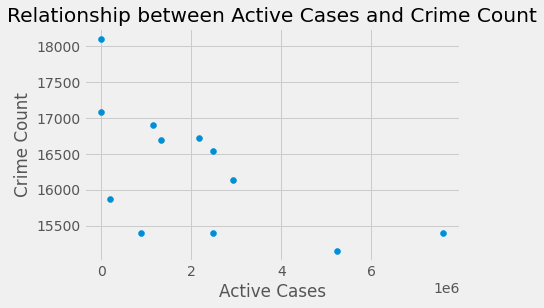

In [100]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))

plt.scatter(df_crime_cases["active_cases"], df_crime_cases["crime_count"])
plt.xlabel("Active Cases")
plt.ylabel("Crime Count")
plt.title("Relationship between Active Cases and Crime Count")

<AxesSubplot:>

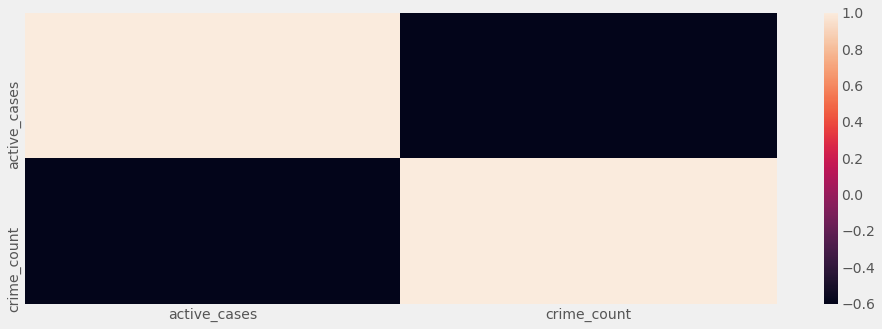

In [96]:
sns.heatmap(df_crime_cases.corr())

It can be inferred from the correlation map and scatterplot that there is a negative correlation between the COVID-19 active cases and the number of crimes committed.

---

In [145]:
df["is_vehicle_stolen"] = (df["Crm Cd Desc"] == 'VEHICLE - STOLEN')
df["is_assault"] = (df["Crm Cd Desc"] == 'BATTERY - SIMPLE ASSAULT')
df["is_vandalism"] = (df['Crm Cd Desc'].str.contains('VANDALISM'))
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month,Year,day_of_week,is_vehicle_stolen,is_assault,is_vandalism
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,01,2020,Wednesday,False,True,False
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,01,2020,Wednesday,False,True,False
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,09,2020,Wednesday,False,False,True
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,01,2020,Wednesday,False,False,True
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,01,2020,Wednesday,False,False,True


In [147]:
df_top3 = df[['Crm Cd Desc', 'day_of_week', 'LAT', 'LON', 'is_vehicle_stolen', 'is_assault', 'is_vandalism']]
df_top3.head()

,Crm Cd Desc,day_of_week,LAT,LON,is_vehicle_stolen,is_assault,is_vandalism
0,BATTERY - SIMPLE ASSAULT,Wednesday,34.0141,-118.2978,False,True,False
1,BATTERY - SIMPLE ASSAULT,Wednesday,34.0459,-118.2545,False,True,False
2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,33.9739,-118.2630,False,False,True
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,34.1685,-118.4019,False,False,True
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Wednesday,34.2198,-118.4468,False,False,True


In [148]:
day_of_week_columns = pd.get_dummies(df_top3['day_of_week'])
df_top3_complete = df_top3.merge(day_of_week_columns, left_index=True, right_index=True)
df_top3_complete.head()

,Crm Cd Desc,day_of_week,LAT,LON,is_vehicle_stolen,is_assault,is_vandalism,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,BATTERY - SIMPLE ASSAULT,Wednesday,34.0141,-118.2978,False,True,False,0,0,0,0,0,0,1
1,BATTERY - SIMPLE ASSAULT,Wednesday,34.0459,-118.2545,False,True,False,0,0,0,0,0,0,1
2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,33.9739,-118.2630,False,False,True,0,0,0,0,0,0,1
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,34.1685,-118.4019,False,False,True,0,0,0,0,0,0,1
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Wednesday,34.2198,-118.4468,False,False,True,0,0,0,0,0,0,1


<AxesSubplot:>

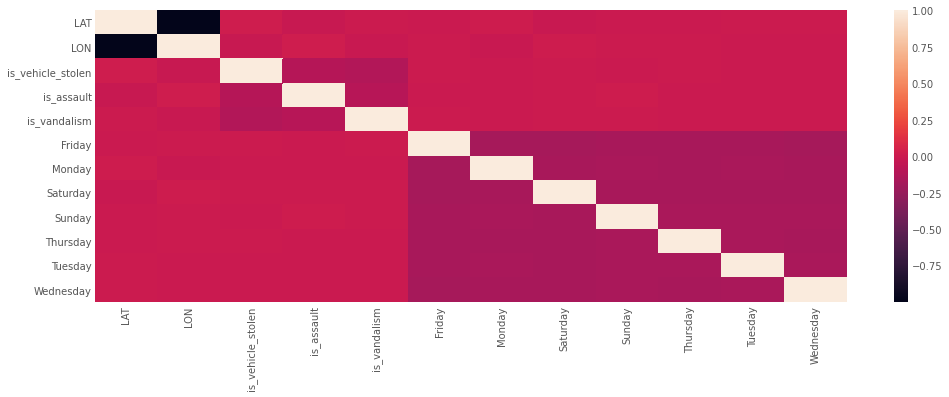

In [153]:
sns.heatmap(df_top3_complete.corr())

From the heatmap, correlations between the days of the week and the coordinates to the crime committed aren't valued as high. This poses an issue since in building the classifier, logistic regression will be used.

---

### Building classifier for determining if a vehicle will be stolen or not based on day of the week and location

In [159]:
X = df_top3_complete[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'LAT', 'LON']]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df_top3_complete["is_vehicle_stolen"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
predictions = logistic_model.predict(X)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [162]:
df_top3_complete["predicted_vehicle_stolen"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]
df_top3_complete["prob_vehicle_stolen"] = prob

In [163]:
df_top3_complete[['Crm Cd Desc', 'day_of_week', 'is_vehicle_stolen', 'predicted_vehicle_stolen',  'prob_vehicle_stolen']].head(10)

,Crm Cd Desc,day_of_week,is_vehicle_stolen,predicted_vehicle_stolen,prob_vehicle_stolen
0,BATTERY - SIMPLE ASSAULT,Wednesday,False,False,0.496984
1,BATTERY - SIMPLE ASSAULT,Wednesday,False,False,0.496917
2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,False,False,0.496893
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,False,False,0.497275
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Wednesday,False,False,0.497392
5,"RAPE, FORCIBLE",Wednesday,False,False,0.496914
6,SHOPLIFTING - PETTY THEFT ($950 & UNDER),Thursday,False,False,0.499550
7,OTHER MISCELLANEOUS CRIME,Saturday,False,True,0.503135
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",Saturday,False,True,0.503133
9,CRIMINAL THREATS - NO WEAPON DISPLAYED,Saturday,False,True,0.503141


### Getting the mean probability per day of the week

In [165]:
df_vehicle_stolen = pd.DataFrame(df_top3_complete.groupby(df_top3_complete['day_of_week'])['prob_vehicle_stolen'].mean().sort_values())
df_vehicle_stolen

,prob_vehicle_stolen
day_of_week,
Tuesday,0.494259
Wednesday,0.495584
Sunday,0.496366
Thursday,0.498052
Monday,0.500676
Saturday,0.501278
Friday,0.509190


---

### Building classifier for determining if a simple assault will occur or not based on day of the week and location

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df_top3_complete["is_assault"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
predictions = logistic_model.predict(X)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [169]:
df_top3_complete["predicted_assault"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]
df_top3_complete["prob_assault"] = prob

In [170]:
df_top3_complete[['Crm Cd Desc', 'day_of_week', 'is_assault', 'predicted_assault',  'prob_vehicle_stolen']].head(10)

,Crm Cd Desc,day_of_week,is_assault,predicted_assault,prob_vehicle_stolen
0,BATTERY - SIMPLE ASSAULT,Wednesday,True,False,0.496984
1,BATTERY - SIMPLE ASSAULT,Wednesday,True,False,0.496917
2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,False,False,0.496893
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,False,False,0.497275
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Wednesday,False,False,0.497392
5,"RAPE, FORCIBLE",Wednesday,False,False,0.496914
6,SHOPLIFTING - PETTY THEFT ($950 & UNDER),Thursday,False,False,0.499550
7,OTHER MISCELLANEOUS CRIME,Saturday,False,True,0.503135
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",Saturday,False,True,0.503133
9,CRIMINAL THREATS - NO WEAPON DISPLAYED,Saturday,False,True,0.503141


### Getting the mean probability per day of the week

In [171]:
df_assault = pd.DataFrame(df_top3_complete.groupby(df_top3_complete['day_of_week'])['prob_assault'].mean().sort_values())
df_assault

,prob_assault
day_of_week,
Tuesday,0.489031
Wednesday,0.492980
Monday,0.493110
Friday,0.493379
Thursday,0.498932
Saturday,0.504160
Sunday,0.524708


---

### Building classifier for determining if a vandalism will occur or not based on day of the week and location

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df_top3_complete["is_vandalism"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
predictions = logistic_model.predict(X)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [173]:
df_top3_complete["predicted_vandalism"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]
df_top3_complete["prob_vandalism"] = prob

In [174]:
df_top3_complete[['Crm Cd Desc', 'day_of_week', 'is_vandalism', 'predicted_vandalism',  'prob_vandalism']].head(10)

,Crm Cd Desc,day_of_week,is_vandalism,predicted_vandalism,prob_vandalism
0,BATTERY - SIMPLE ASSAULT,Wednesday,False,True,0.501740
1,BATTERY - SIMPLE ASSAULT,Wednesday,False,False,0.496999
2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,True,True,0.504943
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),Wednesday,True,False,0.488518
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Wednesday,True,False,0.484449
5,"RAPE, FORCIBLE",Wednesday,False,False,0.497039
6,SHOPLIFTING - PETTY THEFT ($950 & UNDER),Thursday,False,False,0.493803
7,OTHER MISCELLANEOUS CRIME,Saturday,False,True,0.507493
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",Saturday,False,True,0.504814
9,CRIMINAL THREATS - NO WEAPON DISPLAYED,Saturday,False,True,0.524094


### Getting the mean probability per day of the week

In [175]:
df_vandalism = pd.DataFrame(df_top3_complete.groupby(df_top3_complete['day_of_week'])['prob_vandalism'].mean().sort_values())
df_vandalism

,prob_vandalism
day_of_week,
Monday,0.487143
Thursday,0.493644
Wednesday,0.496947
Sunday,0.497951
Tuesday,0.503133
Saturday,0.507330
Friday,0.510852
